In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import psi4
import v3d

In [2]:
#originally intended to use psi4 to compute energies, setting output file and some basic variables. 
psi4.core.set_output_file('oofp.dat')
theory = 'mp2/6-31G*'
rad2deg = 180.0/np.pi

In [3]:
#optimized coordinates of the molecule from a previous calc
azi = """
0 1
    C           -1.372186183321    -2.010860020902    -0.886820192828
    C           -0.173158673000    -1.298344357907    -0.406115006426
    N            0.786309071860    -1.384810968974     0.420697487368
    C            0.662837700048    -0.111043752576    -0.491918176988
    H            1.422532833369    -0.002132476819    -1.261568419806
    C            0.271415655367     1.154529325936     0.168585840901
    O           -0.638034693748     0.950769479245     1.162558403008
    O            0.686902544636     2.258017066085    -0.144478115352
    H           -1.457401352716    -2.978238526949    -0.387585199421
    H           -1.313874303487    -2.157164437091    -1.968871402470
    H           -2.260422649854    -1.409349289546    -0.673788389312
    H           -0.815494634684     1.839688017493     1.533442847642
"""


In [4]:
#what coordinates are we optimizing
coords = [
    (2,  1,  4,  3),
]

opt_coords = np.zeros(len(coords))
#print the optimized values of these coordinates:
#also, save these values for later
azi_geo = psi4.geometry(azi)
for item, quad in enumerate(coords):
    opt_coords[item] = v3d.oofp((azi_geo.to_arrays()[0])[quad[0]-1],
                                (azi_geo.to_arrays()[0])[quad[1]-1],
                                (azi_geo.to_arrays()[0])[quad[2]-1],
                                (azi_geo.to_arrays()[0])[quad[3]-1])*rad2deg
    print(coords[item], opt_coords[item])

opt_energy = -359.534737982901#opt energy from q-chem
#psi4.energy(theory)
print(opt_energy)


(2, 1, 4, 3) 0.3336466719126308
-359.534737982901


In [5]:
#performed scan using Q-Chem
energies = np.array([
   -359.533681738811,     
   -359.534090884849,     
   -359.534398717366,     
   -359.534606708984,     
   -359.534715801608,     
   -359.534726895627,     
   -359.534637986246,     
   -359.534459031311,     
   -359.534174041819,     
   -359.533788883699,     
   -359.533303207359   
])

t_real = np.arange(-5, 6, 1)
print(t_real)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]


In [6]:
energies_norm = (energies-opt_energy)*627.503 # 1 Hartree = 627.503 kcal/mol

In [7]:
print(energies_norm)

[0.66279634 0.40605597 0.21289014 0.08237478 0.01391883 0.0069573
 0.0627482  0.17504296 0.35387472 0.5955626  0.90032596]


Text(0.5, 0, 'Out-of-plane angle [degree]')

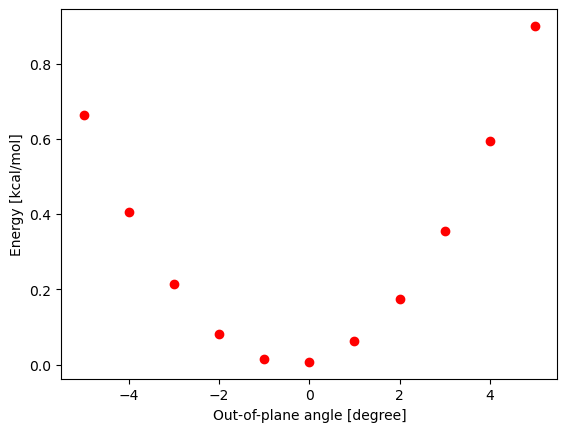

In [8]:
#collected data plots
colors = ['r', 'g', 'b']

plt.plot(t_real, energies_norm, 'o', color=colors[0]) 
              
plt.ylabel('Energy [kcal/mol]')
plt.xlabel('Out-of-plane angle [degree]')

In [9]:
def vbond(t, k, t0):
    return k*(t-t0)**2

In [10]:
parms = []
                 
parms.append(spo.curve_fit(vbond, 
                               t_real, 
                               energies_norm, 
                               p0=[70, 0]))

Text(0.5, 0, 'Out-of-plane angle [degree]')

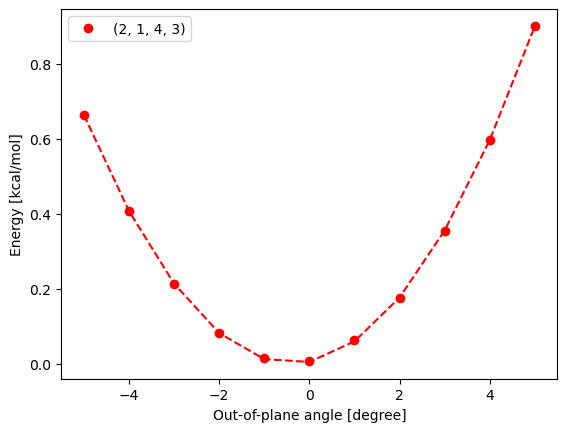

In [11]:
#fitted data plots
colors = ['r', 'g', 'b']

plt.plot(t_real, energies_norm, 'o', color=colors[0], label=str(coords[0])) 
plt.plot(t_real, vbond(t_real, *parms[0][0]), '--', color=colors[0])
plt.legend()
plt.ylabel('Energy [kcal/mol]')
plt.xlabel('Out-of-plane angle [degree]')

In [12]:
print('For the angle between atoms ', str(coords[0]))
print('the force constant is ', str(parms[0][0][0]), '\u00B1', np.sqrt(np.diag(parms[0][1]))[0], 'kcal/mol/degrees^2')
print('and the optimal angle length is ', str(parms[0][0][1]), '\u00B1', np.sqrt(np.diag(parms[0][1]))[1], 'degrees')


For the angle between atoms  (2, 1, 4, 3)
the force constant is  0.031059037934693737 ± 4.00928920117598e-05 kcal/mol/degrees^2
and the optimal angle length is  -0.38127239842604194 ± 0.0027690954567965867 degrees
